In [ ]:
# as you can see current ram is 12GB only, to increase it run below code

NameError: ignored

In [ ]:
i = []
while True:
  i.append(i)

In [ ]:
# wait for few minutes, after that you will get a prompt that your notebook got crashed, do you want to increase ram ?

In [ ]:
# in the prompt click - yes

In [ ]:
# as you see the ram increase from 12GB to 25GB

In [ ]:
#thanks for watching, keep learning 

**NOTE**: PLease allow your browser to allow show pop-ups by sites as show below 

In [ ]:
#step-1

In [ ]:
#step-2

TOURIST ACCOMODATION REVIEW

In [ ]:
#Install libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

In [259]:
#simple text example
simple_text = 'This isn\'t a real text, this is an example text... Notice this contains punctuation!!'

In [260]:
#identify regular expression and apply tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')

tokenized_document = tokenizer.tokenize(simple_text)

print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [261]:
#identify stop words
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [262]:
#Remove stopwords
cleaned_tokens = []

for word in tokenized_document:
    word = word.lower()
    if word not in stop_words:
        cleaned_tokens.append(word)

print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [263]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos = ['n', 'v', 'v', 'n', 'a', 'r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)


Lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [264]:
#Stemming on example sentence
stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [265]:
#Define preprocessing function
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

TEXT MINING 

In [266]:
data = pd.read_csv("/content/tourist_accommodation_reviews.csv", encoding='cp1252')

data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [267]:
data.info() #Spool dataset description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [268]:
data.rename(columns = {'Hotel/Restaurant name':'Business_name',}, inplace = True) #rename Hotel/Restaurant name column

In [269]:
data.info() #confirm column name fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             53644 non-null  object
 1   Review Date    53644 non-null  object
 2   Location       53644 non-null  object
 3   Business_name  53644 non-null  object
 4   Review         53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [270]:
data.Business_name.unique() #Confirm unique values in the 'Business_name' Column:

array(['Thong Dee The Kathu Brasserie',
       'Odysseus Greek Organic Restaurant', 'Green Tamarind Kitchen',
       'Dee Plee - Anantara Layan Phuket Resort', 'The Tavern',
       'EAT. bar & grill', 'Surf and Turf by Soul Kitchen',
       'Siam Supper Club', "Sam's Steaks and Grill",
       'Istanbul Turkish Restaurant', 'The Corner Restaurant',
       'Kataturk Turkish Restaurant', 'Sala Sawasdee Lobby Bar',
       'The Palm Cuisine', 'Highway Curry Indian & Thai Cuisine',
       'Tandoori Flames', 'Pad Thai Shop', 'Golden Paradise Restaurant',
       'Mr.Coffee', 'Flavor Phuket', 'Baan Noy Restaurant',
       'Ao Chalong Yacht Club Restaurant', "Naughty Nuri's Phuket",
       'Surin Chill House', 'Natural Efe Macrobiotic World',
       'Honeymoon Thai Restaurant by Kenya', 'O-OH Farm Ta-Eiad',
       'Da Puccio Restaurant', 'Sizzle Rooftop Restaurant',
       "Benny's American Bar & Grill", 'Climax on Bangla',
       'Le Brooklyn Patong', 'La Dolce Vita Restaurant', 'Sabaijai Cafe'

In [271]:
data_k = data[data["Location"] == " Kamala"] #Confirm how many accomodations are in the Location ' Kamala' and store them in a new variable called data_k:
data_k.shape

(3162, 5)

In [272]:
data_k

,ID,Review Date,Location,Business_name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."
...,...,...,...,...,...
52475,rn337159219,"Reviewed January 4, 2016",Kamala,Karon Seafood,This is a busy restaurant but the service is v...
52476,rn335662582,"Reviewed December 29, 2015",Kamala,Karon Seafood,It was our first night in Karon and we didn't ...
52477,rn334004242,"Reviewed December 20, 2015",Kamala,Karon Seafood,We unfortunately didn't read trip-advisor befo...
52478,rn329307909,"Reviewed November 26, 2015",Kamala,Karon Seafood,"Ordered springrolls, phad tai and red curry.\r..."


In [273]:
data_k.groupby("Location")["Business_name"].count() #Explore the data further to see how many locations exist:

Location
 Kamala    3162
Name: Business_name, dtype: int64

In [274]:
data_k.groupby("Business_name")["Location"].count() #see how many business are represented:

Business_name
Baan Mai                                                         100
Baan Rim Pa Kalim                                                100
Bellini                                                           95
Bianconero da Tuveri Restaurant & Pizzeria                        98
Blue Manao                                                       100
Bush Garden Kamala<U+200B>                                        99
Cafe del Mar Phuket                                              100
Danny's Place Kamala                                              97
Grill Bill                                                       100
H.C. Andersen - Family Restaurant                                100
HQ Beach Lounge                                                  100
Heaven                                                            95
Hey Ha Bar & Restaurant                                           95
Kaab Gluay                                                       100
Karon Seafood       

In [275]:
#Sort the data by Location in descending order, and group the rows by Business_name, using the first of each group:
data_f = data_k.sort_values(['Location'],ascending=False).groupby('Business_name').head(1)
data_f.head(30)

,ID,Review Date,Location,Business_name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
32056,rn526703384,"Reviewed September 23, 2017",Kamala,Mamma Mia Grill & Restaurant Kamala,Watch the sunset on the beach while dining at ...
32031,rn191430878,"Reviewed January 20, 2014",Kamala,Ohlala,"Ate here twice and it was great. Wifi, really ..."
31638,rn566441766,"Reviewed March 14, 2018",Kamala,Pond Restaurant,The glass noodles were very good! Service was ...
33703,rn540883385,"Reviewed November 14, 2017",Kamala,Bellini,Been twice during my short stay in Chalong and...
33505,rn334852372,"Reviewed December 24, 2015",Kamala,Kaab Gluay,Thai restaurant with great Thai Food and great...
25404,rn545169206,"Reviewed December 4, 2017",Kamala,THE DECK,The only reason to eat here is the view and th...
23989,rn447144614,"Reviewed December 28, 2016",Kamala,Smile Bar,Came twice in two days. All dishes are freshly...
23692,rn404831099,"Reviewed August 13, 2016",Kamala,HQ Beach Lounge,"This beach club is very cool, the DJ was great..."
29640,rn249361762,"Reviewed January 14, 2015",Kamala,Sweet Dream Restaurant,Stopped here last night for a casual dinner. I...


In [276]:
data_f.shape #Confirm size of the new data

(32, 5)

This ensures we have selected one unique business from the data, resulting in a total of 30 business.

In [176]:
#data_f = data_f.head(30)#Select the first 30 tourist businesses

In [277]:
data_f

,ID,Review Date,Location,Business_name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
32056,rn526703384,"Reviewed September 23, 2017",Kamala,Mamma Mia Grill & Restaurant Kamala,Watch the sunset on the beach while dining at ...
32031,rn191430878,"Reviewed January 20, 2014",Kamala,Ohlala,"Ate here twice and it was great. Wifi, really ..."
31638,rn566441766,"Reviewed March 14, 2018",Kamala,Pond Restaurant,The glass noodles were very good! Service was ...
33703,rn540883385,"Reviewed November 14, 2017",Kamala,Bellini,Been twice during my short stay in Chalong and...
33505,rn334852372,"Reviewed December 24, 2015",Kamala,Kaab Gluay,Thai restaurant with great Thai Food and great...
25404,rn545169206,"Reviewed December 4, 2017",Kamala,THE DECK,The only reason to eat here is the view and th...
23989,rn447144614,"Reviewed December 28, 2016",Kamala,Smile Bar,Came twice in two days. All dishes are freshly...
23692,rn404831099,"Reviewed August 13, 2016",Kamala,HQ Beach Lounge,"This beach club is very cool, the DJ was great..."
29640,rn249361762,"Reviewed January 14, 2015",Kamala,Sweet Dream Restaurant,Stopped here last night for a casual dinner. I...


In [278]:
data_f = data_f[~data_f["Business_name"].str.contains("SILK Restaurant & Bar", na=False)] #filter row with improperly encoded text.

In [279]:
data_f.shape

(31, 5)

In [280]:
data_f.Business_name.unique()

array(['Grill Bill', 'Mamma Mia Grill & Restaurant Kamala', 'Ohlala',
       'Pond Restaurant', 'Bellini', 'Kaab Gluay', 'THE DECK',
       'Smile Bar', 'HQ Beach Lounge', 'Sweet Dream Restaurant',
       'Wine Connection Deli & Bistro - Central Phuket', 'Heaven',
       'Top Of The Reef at Cape Panwa Hotel', 'Karon Seafood',
       'Salt & Pepper Restaurant Steakhouse Pizzeria',
       'Cafe del Mar Phuket', "Danny's Place Kamala",
       'H.C. Andersen - Family Restaurant', 'Blue Manao',
       'Bianconero da Tuveri Restaurant & Pizzeria', 'Tantra',
       'Hey Ha Bar & Restaurant', 'The Greek Tavern',
       'Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand',
       'White Orchid', 'Napoli Ristorante Pizzeria', 'Baan Rim Pa Kalim',
       'Oiy Restaurant', 'The Place', 'Baan Mai',
       'Bush Garden Kamala<U+200B>'], dtype=object)

In [281]:
data_f = data_f.head(30) #select first 30 businesses

In [282]:
data_f.shape #Confirm filter has been applied:

(30, 5)

In [283]:
data_f = data_f.drop('ID', axis=1) #Drop ID column

In [284]:
print("\n All Data Labels")
print(data_f.groupby("Business_name").count())


 All Data Labels
                                                    Review Date  Location  \
Business_name                                                               
Baan Mai                                                      1         1   
Baan Rim Pa Kalim                                             1         1   
Bellini                                                       1         1   
Bianconero da Tuveri Restaurant & Pizzeria                    1         1   
Blue Manao                                                    1         1   
Cafe del Mar Phuket                                           1         1   
Danny's Place Kamala                                          1         1   
Grill Bill                                                    1         1   
H.C. Andersen - Family Restaurant                             1         1   
HQ Beach Lounge                                               1         1   
Heaven                                                    

In [285]:
data_f.Location.unique() #Confirm we have one unique location:

array([' Kamala'], dtype=object)

In [286]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 6138 to 16789
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review Date    30 non-null     object
 1   Location       30 non-null     object
 2   Business_name  30 non-null     object
 3   Review         30 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [287]:
data_f['Review'] = data_f['Review'].apply(preprocess_text)

data_f.head()

,Review Date,Location,Business_name,Review
6138,Reviewed 5 days ago,Kamala,Grill Bill,"[best, place, eat, want, time, thai, food, tun..."
32056,"Reviewed September 23, 2017",Kamala,Mamma Mia Grill & Restaurant Kamala,"[watch, sunset, beach, dine, great, restaur, f..."
32031,"Reviewed January 20, 2014",Kamala,Ohlala,"[ate, twice, great, wifi, realli, fast, servic..."
31638,"Reviewed March 14, 2018",Kamala,Pond Restaurant,"[glass, noodl, good, servic, also, good, price..."
33703,"Reviewed November 14, 2017",Kamala,Bellini,"[twice, short, stay, chalong, time, compani, f..."


In [305]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_f['Review'].map(' '.join))
X = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

X.head()

,10,1830,1930,2004,2017,20aud,75,abd,accident,across,...,welcom,well,white,wifi,wine,wit,would,write,writer,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.215092,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228934,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.186514,0.228934,0.0,0.0


In [306]:
from sklearn.model_selection import train_test_split

Y= data_f['Business_name']

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=99)

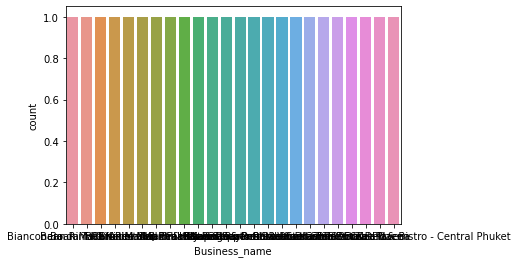

In [293]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(x_train, y_train)

sns.countplot(x=y_train_undersampled)

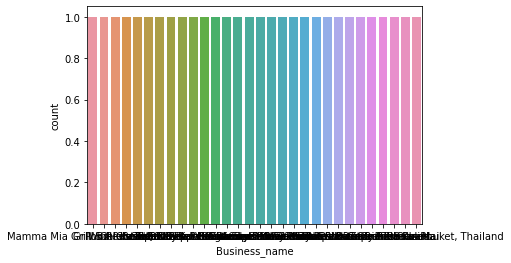

In [301]:
sns.countplot(x=Y)

In [307]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

MultinomialNB()

In [308]:
y_pred = model.predict(x_test)

#Accuracy
from sklearn import metrics
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('confusion_matrix:')
print(cm, '\n\n')
print('----------------------------------------------------')
result= metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)


accuracy:0.00


confusion_matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]] 


----------------------------------------------------
Classification Report:

                                                               precision    recall  f1-score   support

                   Bianconero da Tuveri Restaurant & Pizzeria       0.00      0.00      0.00       0.0
                                         Danny's Place Kamala       0.00      0.00      0.00       1.0
                            H.C. Andersen - Family Restaurant       0.00      0.00      0.00       0.0
                                      Hey Ha Bar & Restaurant       0.00      0.00      0.00       1.0
                                             

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

SENTIMENT ANALYSIS

In [226]:
print(preprocess_text('This movie is great!'))
print(preprocess_text('This movie is not great!'))

['movi', 'great']
['movi', 'great']


In [227]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This move is great!'))
print(sentiment.polarity_scores('This move is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [237]:
from google.colab import files #save copy
data_f.to_csv('review.csv') 
files.download('review.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [309]:
#read review data
review = pd.read_csv("/content/tourist_accommodation_reviews.csv", encoding='cp1252')

review.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [310]:
review.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [311]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [312]:
#Extract values from dictionary to make new columns with sentiment polarity scores
review['compound'] = [sentiment.polarity_scores(review)['compound'] for review in review['Review']]
review['neg'] = [sentiment.polarity_scores(review)['neg'] for review in review['Review']]
review['neu'] = [sentiment.polarity_scores(review)['neu'] for review in review['Review']]
review['pos']  = [sentiment.polarity_scores(review)['pos'] for review in review['Review']]

In [313]:
review.head() #confirm new columns have been added

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,0.0516,0.11,0.772,0.118
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",0.9237,0.00,0.730,0.270
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,0.6808,0.00,0.869,0.131
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,0.8419,0.00,0.823,0.177
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,0.9734,0.00,0.557,0.443


In [314]:
review[['compound', 'neg', 'neu', 'pos']].describe() #confirm summary statistic of the sentiment polarity scores

,compound,neg,neu,pos
count,53644.000000,53644.000000,53644.000000,53644.000000
mean,0.659430,0.026920,0.737564,0.235519
std,0.423819,0.051134,0.127370,0.136031
min,-0.975700,0.000000,0.217000,0.000000
25%,0.585900,0.000000,0.654000,0.133000
50%,0.844200,0.000000,0.744000,0.228000
75%,0.927100,0.042000,0.830000,0.327000
max,0.993200,0.635000,1.000000,0.783000


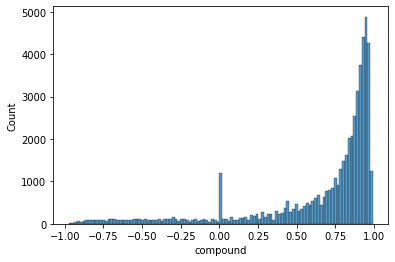

In [315]:
sns.histplot(review['compound'])

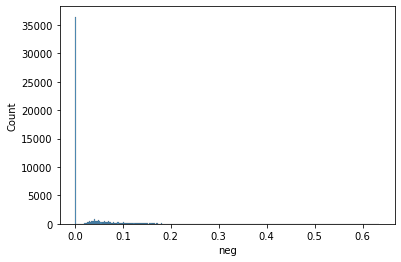

In [316]:
sns.histplot(review['neg'])

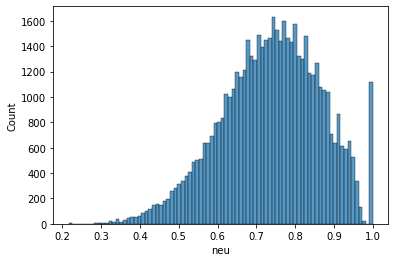

In [317]:
sns.histplot(review['neu'])

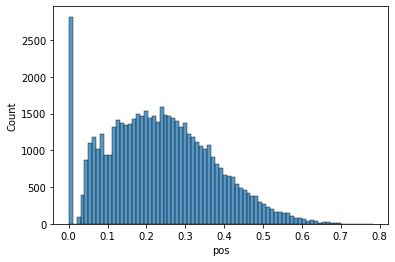

In [318]:
sns.histplot(review['pos'])

In [320]:
#Find out sum of negative reviews per product
(review['compound']<=0).groupby(review['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
+39 Italian Street Food             16
2gether Restaurant                  12
3 Spices Restaurant                  6
360 ° Bar                            5
44 Thaikitchen "KATA FOOD COURT"     4
                                    ..
Ying Restaurant                      6
Yo Green Restaurant                 11
Yorkshire Hotel Restaurant          12
You and Me Patong                   10
i-Kroon Cafe                         5
Name: compound, Length: 537, dtype: int64

In [322]:
#Calculate as percentage of total reviews

percent_negative = pd.DataFrame((review['compound']<=0).groupby(review['Hotel/Restaurant name']).sum()
/review['Hotel/Restaurant name'].groupby(review['Hotel/Restaurant name']).count()*100,
columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel/Restaurant name,
Chekhoff Restaurant and Bar,0.000000
Golbasi,0.000000
Sam's Steaks and Grill,1.000000
Rock Salt,1.000000
Curry Delight Indian Restaurant,1.000000
...,...
Ali Baba Restaurant,37.000000
Restaurant La Croisette,38.297872
Pizza Hut - Jungceylon,39.393939


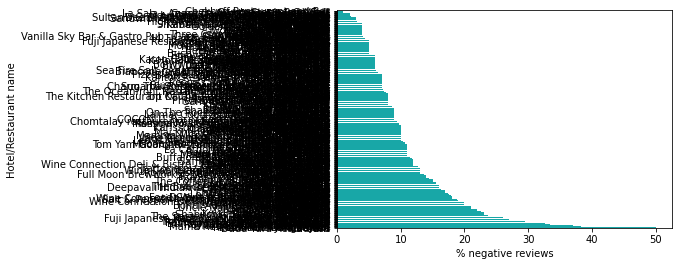

In [323]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')